In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
df = pd.read_csv('CC GENERAL.csv')

In [337]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5801,C15963,1101.328772,0.727273,0.00,0.00,0.00,3061.014837,0.0,0.000000,0.0,0.333333,12,0,3000.0,649.339928,432.288614,0.0,12
2943,C13029,1579.728772,1.000000,0.00,0.00,0.00,124.941315,0.0,0.000000,0.0,0.083333,1,0,1800.0,464.305701,482.666125,0.0,12
2854,C12936,4028.756012,1.000000,361.07,104.38,256.69,0.000000,1.0,0.166667,1.0,0.000000,0,18,4300.0,1279.931508,1537.985000,0.0,12
721,C10748,4881.822347,1.000000,0.00,0.00,0.00,223.953042,0.0,0.000000,0.0,0.250000,3,0,8500.0,1227.062915,1208.463027,0.0,12
1874,C11936,1247.423771,1.000000,0.00,0.00,0.00,503.562164,0.0,0.000000,0.0,0.166667,3,0,1500.0,721.897274,273.128967,0.0,12


In [338]:
df = df.drop(columns=['CUST_ID'])

In [339]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [340]:
df.duplicated().any()

False

In [341]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [342]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categ_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

numeric_cols, categ_cols

(Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
        'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
        'TENURE'],
       dtype='object'),
 Index([], dtype='object'))

In [343]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

In [344]:
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns

# Standardize numerical features
scaler = StandardScaler()
df[df_numeric.columns] = scaler.fit_transform(df[df_numeric.columns])

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [345]:
X = np.asarray(df)
print(X)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


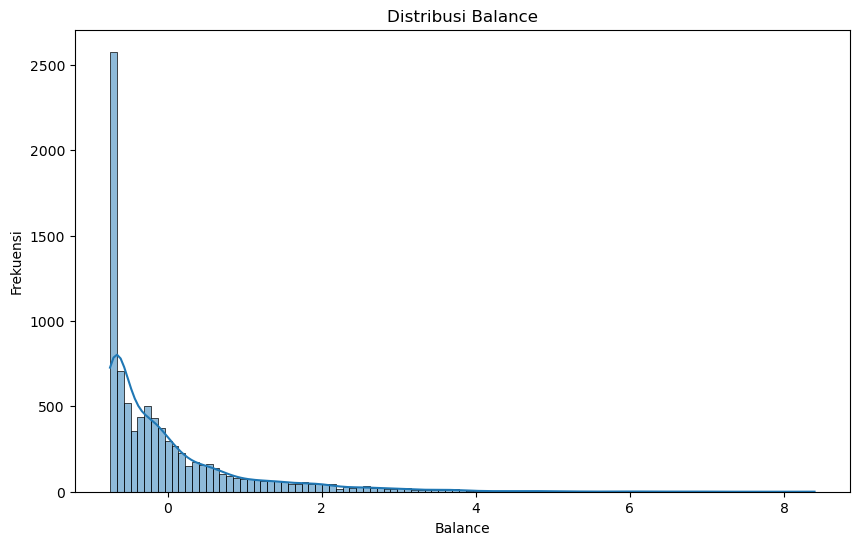

In [346]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BALANCE'], kde=True)
plt.title('Distribusi Balance')
plt.xlabel('Balance')
plt.ylabel('Frekuensi')
plt.show()

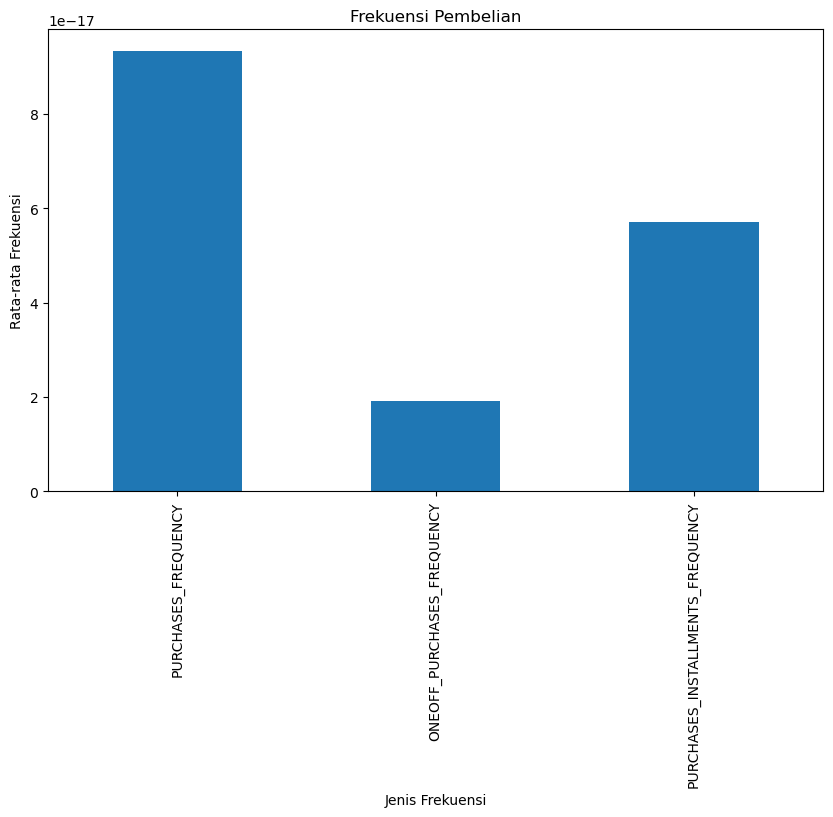

In [347]:
plt.figure(figsize=(10, 6))
df[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']].mean().plot(kind='bar')
plt.title('Frekuensi Pembelian')
plt.xlabel('Jenis Frekuensi')
plt.ylabel('Rata-rata Frekuensi')
plt.xticks(rotation=90)
plt.show()

In [348]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_ 

In [349]:
print(kmeans.cluster_centers_)

[[ 0.06216284 -0.20287103 -0.3388038  -0.23469641 -0.3697208   0.17958573
  -0.72769952 -0.37738109 -0.65020322  0.26852372  0.18861799 -0.45466695
  -0.11907627 -0.11200553 -0.00189411 -0.28282303 -0.08613178]
 [-0.08873421  0.28958781  0.48362473  0.33501688  0.52775713 -0.25634925
   1.03875307  0.5386918   0.92813115 -0.38330359 -0.26924234  0.64901334
   0.16997515  0.15988205  0.00270374  0.40371511  0.12294862]]


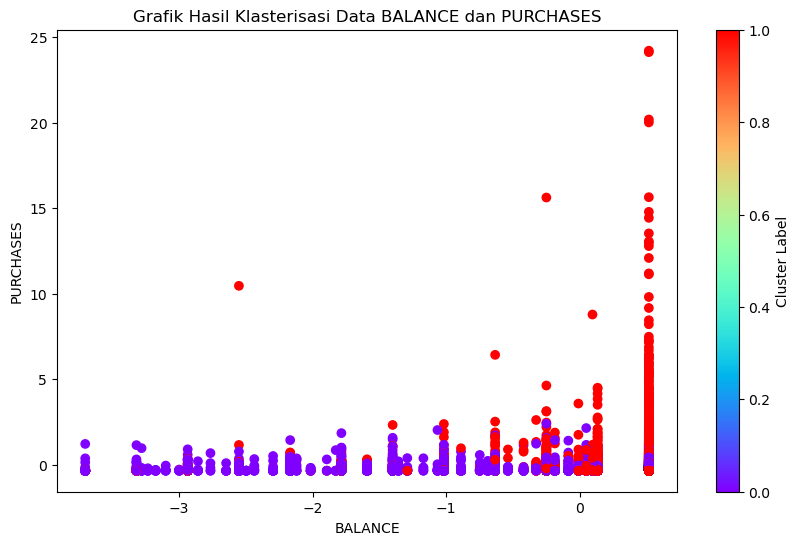

In [350]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 3], c=labels, cmap='rainbow', marker='o')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.colorbar(label='Cluster Label')
plt.title("Grafik Hasil Klasterisasi Data BALANCE dan PURCHASES")
plt.show()

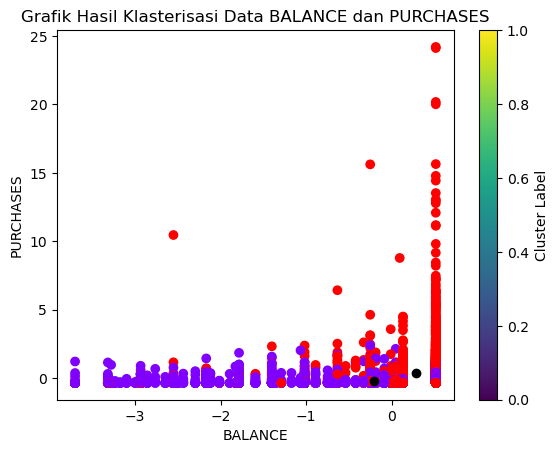

In [351]:
plt.scatter(X[:, 1], X[:, 3], c=labels, cmap='rainbow', marker='o')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], color='black')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.colorbar(label='Cluster Label')
plt.title("Grafik Hasil Klasterisasi Data BALANCE dan PURCHASES")
plt.show()

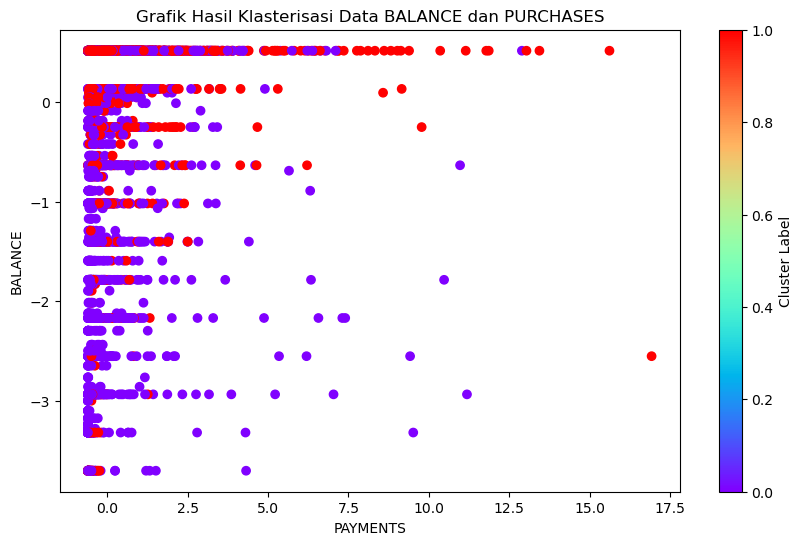

In [352]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 13], X[:, 1], c=labels, cmap='rainbow', marker='o')
plt.xlabel('PAYMENTS')
plt.ylabel('BALANCE')
plt.colorbar(label='Cluster Label')
plt.title("Grafik Hasil Klasterisasi Data BALANCE dan PURCHASES")
plt.show()

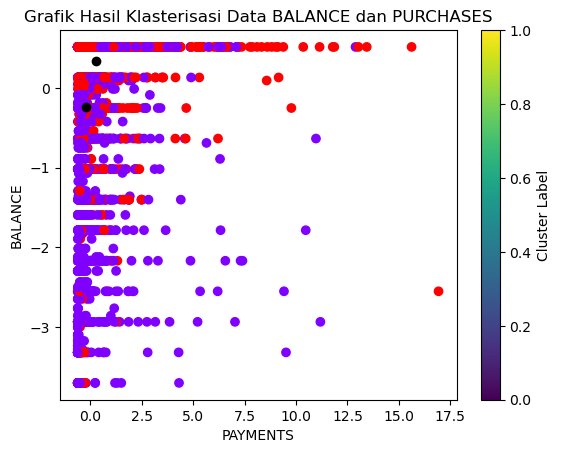

In [353]:
plt.scatter(X[:, 13], X[:, 1], c=labels, cmap='rainbow', marker='o')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], color='black')
plt.xlabel('PAYMENTS')
plt.ylabel('BALANCE')
plt.colorbar(label='Cluster Label')
plt.title("Grafik Hasil Klasterisasi Data BALANCE dan PURCHASES")
plt.show()

In [354]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.210


In [355]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Contoh data (gunakan data Anda sendiri di sini)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Rentang jumlah klaster untuk diuji
n_clusters_range = range(1, 11)

# Menyimpan nilai inertia
inertia = []

# Loop untuk berbagai jumlah klaster
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

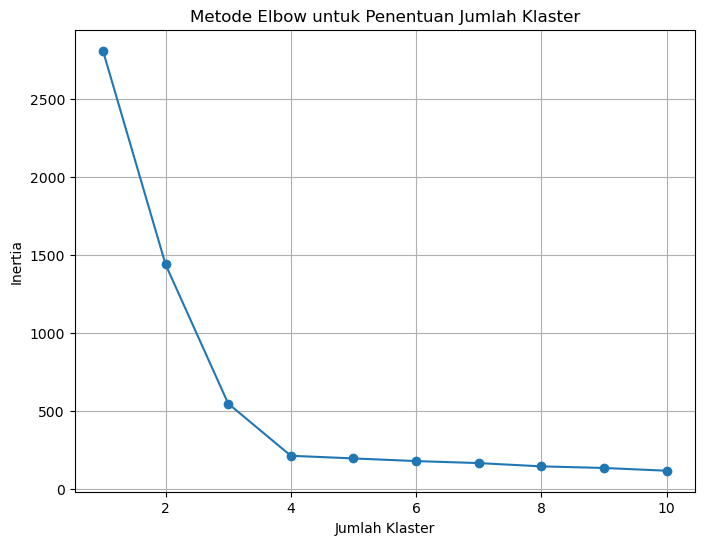

In [356]:
# Plot hasil metode elbow
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Penentuan Jumlah Klaster')
plt.grid(True)
plt.show()